<a href="https://colab.research.google.com/github/Kasemsan054/LabCSD2301/blob/master/rice_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **งานวิจัย เรื่อง การพยากรณ์ผลผลิตข้าวนาปรังจากปริมาณน้ำฝน**

รายชื่อผู้ทำงานวิจัย
1. 64122250033 นาย ศิรา จิตใจฉ่ำ
2. 64122250054 นาย เกษมสันต์ ชัยรัตน์
3. 64122250057 นางสาว ธัญญวรรณ ส่งเสริม

Datasets => [CLICK ME](https://github.com/Kasemsan054/LabCSD2301)

# นำเข้าไลบรารี่

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# ข้อมูล

## ข้อมูลปริมาณการผลิตข้าวนาปรัง

### ผลผลิตข้าวนาปรัง ปี 2564

In [ ]:
rice_2564 = pd.read_csv('https://raw.githubusercontent.com/Kasemsan054/LabCSD2301/master/datasets/%E0%B8%AA%E0%B8%B3%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B9%80%E0%B8%A8%E0%B8%A3%E0%B8%A9%E0%B8%90%E0%B8%81%E0%B8%B4%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%20%20%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%84%E0%B9%89%E0%B8%B2%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B8%99%E0%B8%B2%E0%B8%9B%E0%B8%A3%E0%B8%B1%E0%B8%87%202564.csv')
rice_2564.head()

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,สุพรรณบุรี,"603,384",10%,"820,261",735.60
1,อยุธยา,"461,714",7%,"647,718",712.83
2,นครสวรรค์,"346,383",6%,"521,396",664.34
3,พิจิตร,"307,387",5%,"469,754",654.36
4,พิษณุโลก,"278,354",5%,"454,696",612.18


### ผลผลิตข้าวนาปรัง ปี 2565

In [ ]:
rice_2565 = pd.read_csv('https://raw.githubusercontent.com/Kasemsan054/LabCSD2301/master/datasets/%E0%B8%AA%E0%B8%B3%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B9%80%E0%B8%A8%E0%B8%A3%E0%B8%A9%E0%B8%90%E0%B8%81%E0%B8%B4%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%20%20%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%84%E0%B9%89%E0%B8%B2%E0%B9%80%E0%B8%81%E0%B8%A9%E0%B8%95%E0%B8%A3%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A7%E0%B8%99%E0%B8%B2%E0%B8%9B%E0%B8%A3%E0%B8%B1%E0%B8%87%202565.csv')
rice_2565.head()

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,สุพรรณบุรี,"529,854",10%,"723,071",732.78
1,อยุธยา,"377,129",7%,"532,981",707.58
2,พิจิตร,"316,003",6%,"495,427",637.84
3,พิษณุโลก,"311,253",6%,"524,171",593.80
4,นครสวรรค์,"233,886",4%,"351,734",664.95


## ข้อมูลปริมาณน้ำฝนประเทศไทย ในแต่ละจังหวัด

In [ ]:
rain = pd.read_csv('https://raw.githubusercontent.com/Kasemsan054/LabCSD2301/master/datasets/%E0%B8%8A%E0%B8%B8%E0%B8%94%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%9B%E0%B8%A3%E0%B8%B4%E0%B8%A1%E0%B8%B2%E0%B8%93%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B8%9D%E0%B8%99%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2.csv')
rain.head()

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
0,10,กรุงเทพมหานคร,Bangkok,54.299999,257.230011,142.119137,กลาง,2018,1,1/1/18,มกราคม
1,11,สมุทรปราการ,Samut Prakan,76.250000,256.100006,137.302046,กลาง,2018,1,1/1/18,มกราคม
2,12,นนทบุรี,Nonthaburi,38.360001,161.470001,113.433771,กลาง,2018,1,1/1/18,มกราคม
3,13,ปทุมธานี,Pathum Thani,51.439999,116.500000,82.901688,กลาง,2018,1,1/1/18,มกราคม
4,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,8.850000,88.589996,39.960089,กลาง,2018,1,1/1/18,มกราคม


# การกรองข้อมูล

## ชุดข้อมูลการผลิตข้าวนาปรัง

### ตรวจหาความผิดปกติของข้อมูลเบื้องต้น

In [ ]:
rice_2564.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   จังหวัด                           71 non-null     object 
 1   ผลผลิต(ตัน)                       71 non-null     object 
 2   สัดส่วน                           71 non-null     object 
 3   เนื้อที่เก็บเกี่ยว(ไร่)           71 non-null     object 
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  71 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [ ]:
rice_2565.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   จังหวัด                           72 non-null     object 
 1   ผลผลิต(ตัน)                       72 non-null     object 
 2   สัดส่วน                           72 non-null     object 
 3   เนื้อที่เก็บเกี่ยว(ไร่)           72 non-null     object 
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  72 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


### นำข้อมูลมารวมกันเป็นข้อมูลชุดเดียวกัน

In [ ]:
rices = pd.concat([rice_2564, rice_2565], ignore_index=True)
rices

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,สุพรรณบุรี,"603,384",10%,"820,261",735.60
1,อยุธยา,"461,714",7%,"647,718",712.83
2,นครสวรรค์,"346,383",6%,"521,396",664.34
3,พิจิตร,"307,387",5%,"469,754",654.36
4,พิษณุโลก,"278,354",5%,"454,696",612.18
...,...,...,...,...,...
138,ชุมพร,351,0%,711,493.67
139,แม่ฮ่องสอน,83,0%,149,557.05
140,กระบี่,43,0%,97,443.30
141,ตรัง,12,0%,30,400.00


### เปลี่ยนชื่อคอลัมน์ใหม่

In [ ]:
rices.columns

Index(['จังหวัด', 'ผลผลิต(ตัน)', 'สัดส่วน', 'เนื้อที่เก็บเกี่ยว(ไร่)',
       'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)'],
      dtype='object')

In [ ]:
rices.rename(columns = {'จังหวัด' : 'ProvinceName', 'ผลผลิต(ตัน)' : 'Prod', 'สัดส่วน' : 'Prop', 'เนื้อที่เก็บเกี่ยว(ไร่)' : 'HarvArea',
       'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)' : 'ProdPerHarvArea'}, inplace = True)
rices

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea
0,สุพรรณบุรี,"603,384",10%,"820,261",735.60
1,อยุธยา,"461,714",7%,"647,718",712.83
2,นครสวรรค์,"346,383",6%,"521,396",664.34
3,พิจิตร,"307,387",5%,"469,754",654.36
4,พิษณุโลก,"278,354",5%,"454,696",612.18
...,...,...,...,...,...
138,ชุมพร,351,0%,711,493.67
139,แม่ฮ่องสอน,83,0%,149,557.05
140,กระบี่,43,0%,97,443.30
141,ตรัง,12,0%,30,400.00


### แปลงข้อมูล จาก object เป็น numerical

In [ ]:
# กำจัดเครื่องหมาย (,) และเปลี่ยนชนิดข้อมูลให้เป็น float
rices['Prod'] = rices['Prod'].str.replace(',', '').astype(float)
rices['HarvArea'] = rices['HarvArea'].str.replace(',', '').astype(float)

In [ ]:
rices.dtypes

ProvinceName        object
Prod               float64
Prop                object
HarvArea           float64
ProdPerHarvArea    float64
dtype: object

In [ ]:
rices

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea
0,สุพรรณบุรี,603384.0,10%,820261.0,735.60
1,อยุธยา,461714.0,7%,647718.0,712.83
2,นครสวรรค์,346383.0,6%,521396.0,664.34
3,พิจิตร,307387.0,5%,469754.0,654.36
4,พิษณุโลก,278354.0,5%,454696.0,612.18
...,...,...,...,...,...
138,ชุมพร,351.0,0%,711.0,493.67
139,แม่ฮ่องสอน,83.0,0%,149.0,557.05
140,กระบี่,43.0,0%,97.0,443.30
141,ตรัง,12.0,0%,30.0,400.00


### ลบแถวข้อมูลที่ผิดปกติเกินเหตุ (Over Outlier)

In [ ]:
rices = rices[(rices['Prod'] > 10000) & (rices['Prod'] < 100000)]
rices

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea
23,อ่างทอง,99868.0,2%,154160.0,647.82
24,สระบุรี,95702.0,2%,146284.0,654.22
25,ขอนแก่น,79951.0,1%,138243.0,578.34
26,อุบลราชธานี,79618.0,1%,165902.0,479.91
27,ปราจีนบุรี,77814.0,1%,124479.0,625.12
...,...,...,...,...,...
116,พัทลุง,15056.0,0%,28049.0,536.77
117,หนองบัวลำภู,13649.0,0%,27119.0,503.30
118,สุรินทร์,13601.0,0%,29301.0,464.18
119,ปัตตานี,12268.0,0%,20245.0,605.98


## ข้อมูลปริมาณน้ำฝน

### ตรวจหาความผิดปกติของข้อมูลเบื้องต้น

In [ ]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      4235 non-null   int64  
 1   ProvinceName    4235 non-null   object 
 2   ProvinceName 2  4235 non-null   object 
 3   MinRain         4235 non-null   float64
 4   MaxRain         4235 non-null   float64
 5   AvgRain         4235 non-null   float64
 6   region          4235 non-null   object 
 7   Year            4235 non-null   int64  
 8   Month           4235 non-null   int64  
 9   Date            4235 non-null   object 
 10  Month_TH        4235 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 364.1+ KB


### เลือกข้อมูลปริมาณน้ำฝนช่วงปี 2021 - 2022

In [ ]:
# ตัดชุดข้อมูล เอาข้อมูลตั้งแต่มี ค.ศ.2019 - 2021
rain_2021to2022 = rain[(rain['Year'] >= 2021) & (rain['Year'] <= 2022)]
rain_2021to2022

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
2772,10,กรุงเทพมหานคร,Bangkok,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2773,11,สมุทรปราการ,Samut Prakan,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2774,12,นนทบุรี,Nonthaburi,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2775,13,ปทุมธานี,Pathum Thani,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
2776,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,0.000000,0.000000,0.000000,กลาง,2021,1,1/1/21,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
4230,92,ตรัง,Trang,158.050003,433.649994,293.423136,ใต้,2022,7,1/7/22,กรกฎาคม
4231,93,พัทลุง,Phatthalung,101.309998,264.140015,144.777569,ใต้,2022,7,1/7/22,กรกฎาคม
4232,94,ปัตตานี,Pattani,127.589996,214.440002,172.280939,ใต้,2022,7,1/7/22,กรกฎาคม
4233,95,ยะลา,Yala,122.440002,189.169998,148.495964,ใต้,2022,7,1/7/22,กรกฎาคม


### รวมกลุ่มข้อมูลปริมาณน้ำฝนจากรายเดือนเป็นรายปี ตาม ปี, รหัสจังหวัด, ชื่อจังหวัด และ ภูมิภาค และหาผลรวมของค่าเฉลี่ยน้ำฝน

In [ ]:
grouped_rain = rain_2021to2022.groupby(['Year','ProvinceID','ProvinceName','region'])['AvgRain'].sum().reset_index()
grouped_rain['AvgRain'] = grouped_rain['AvgRain'] / 12
grouped_rain

,Year,ProvinceID,ProvinceName,region,AvgRain
0,2021,10,กรุงเทพมหานคร,กลาง,123.985676
1,2021,11,สมุทรปราการ,กลาง,136.733381
2,2021,12,นนทบุรี,กลาง,113.027516
3,2021,13,ปทุมธานี,กลาง,112.869163
4,2021,14,พระนครศรีอยุธยา,กลาง,100.002572
...,...,...,...,...,...
149,2022,92,ตรัง,ใต้,115.191427
150,2022,93,พัทลุง,ใต้,114.451084
151,2022,94,ปัตตานี,ใต้,98.544058
152,2022,95,ยะลา,ใต้,102.228169


### ผสานชุดข้อมูลข้าวนาปรังกับข้อมูลปริมาณน้ำฝนเข้าด้วยกัน

In [ ]:
merged_complete = rices.merge(grouped_rain, on=['ProvinceName'])
merged_complete

,ProvinceName,Prod,Prop,HarvArea,ProdPerHarvArea,Year,ProvinceID,region,AvgRain
0,อ่างทอง,99868.0,2%,154160.0,647.82,2021,15,กลาง,96.374153
1,อ่างทอง,99868.0,2%,154160.0,647.82,2022,15,กลาง,47.839271
2,อ่างทอง,47337.0,1%,73823.0,641.22,2021,15,กลาง,96.374153
3,อ่างทอง,47337.0,1%,73823.0,641.22,2022,15,กลาง,47.839271
4,สระบุรี,95702.0,2%,146284.0,654.22,2021,19,กลาง,122.330252
...,...,...,...,...,...,...,...,...,...
117,ราชบุรี,53558.0,1%,75597.0,708.47,2022,70,ตะวันตก,46.444330
118,ลพบุรี,51103.0,1%,85854.0,595.23,2021,16,กลาง,111.823903
119,ลพบุรี,51103.0,1%,85854.0,595.23,2022,16,กลาง,55.181041
120,ปัตตานี,12268.0,0%,20245.0,605.98,2021,94,ใต้,168.229246


### ส่งออกข้อมูลหลังจากผสานข้อมูลทั้งหมดเข้าด้วยกันแล้ว เป็นไฟล์ .csv

In [ ]:
merged_complete.to_csv("rices.csv")

## เลือก Features ที่จำเป็นในการวิเคราะห์

In [ ]:
complete_df = merged_complete[['Prod','HarvArea','AvgRain']]
complete_df

,Prod,HarvArea,AvgRain
0,99868.0,154160.0,96.374153
1,99868.0,154160.0,47.839271
2,47337.0,73823.0,96.374153
3,47337.0,73823.0,47.839271
4,95702.0,146284.0,122.330252
...,...,...,...
117,53558.0,75597.0,46.444330
118,51103.0,85854.0,111.823903
119,51103.0,85854.0,55.181041
120,12268.0,20245.0,168.229246


### การหาค่า outlier และการกำจัดค่า outlier


In [ ]:
def IQR_Outlier_Detection(df, col):
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return upper_bound, lower_bound

In [ ]:
def fillNull(df, col):
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

In [ ]:
def outlierToNull(df, col, upper, lower):
    df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)

In [ ]:
# !edit def outlier
def complete_outlier(df, col):
    print('')
    upper_limit, lower_limit = IQR_Outlier_Detection(df, col)
    outlierToNull(df, col, upper_limit, lower_limit)
    fillNull(df, col)

### Outlier Prod

In [ ]:
complete_df.head(5)

,Prod,HarvArea,AvgRain
0,99868.0,154160.0,96.374153
1,99868.0,154160.0,47.839271
2,47337.0,73823.0,96.374153
3,47337.0,73823.0,47.839271
4,95702.0,146284.0,122.330252


<Axes: >

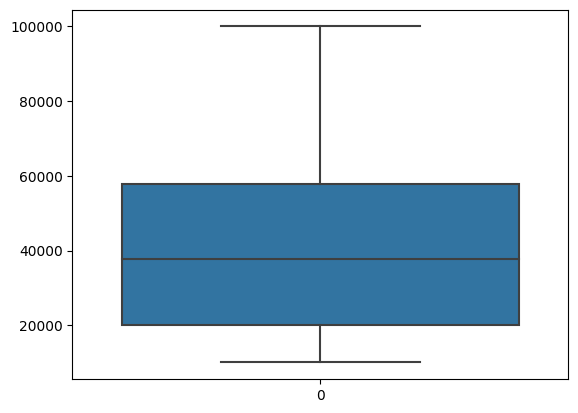

In [ ]:
sns.boxplot(complete_df['Prod'])

In [ ]:
complete_outlier(complete_df, 'Prod')

<ipython-input-82-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-81-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


### Outlier HarvArea

<Axes: >

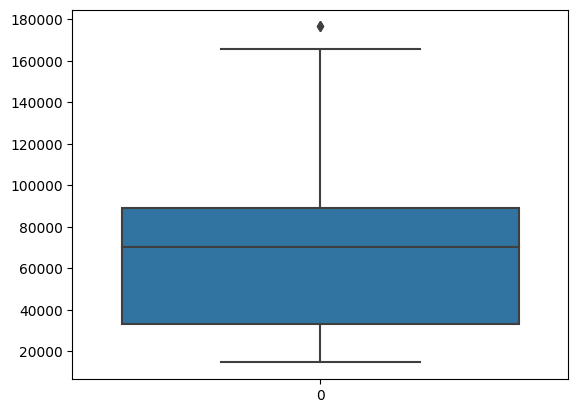

In [ ]:
sns.boxplot(complete_df['HarvArea'])

In [ ]:
complete_outlier(complete_df, 'HarvArea')

<ipython-input-82-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-81-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


### Outlier AvgRain

<Axes: >

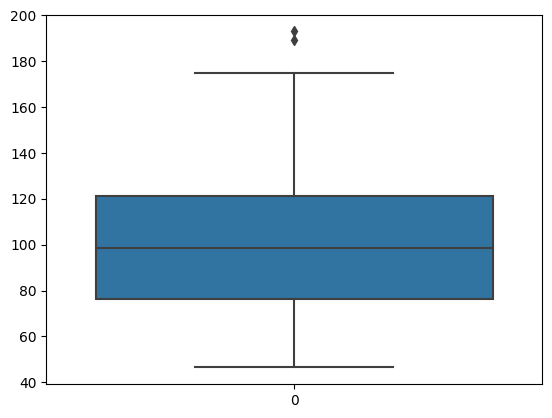

In [ ]:
sns.boxplot(complete_df['AvgRain'])

In [ ]:
complete_outlier(complete_df, 'AvgRain')

<ipython-input-82-c8fad593cc35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-81-89531c1ca233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


# หาความสัมพันธ์ของข้อมูลระหว่าง Features

In [ ]:
complete_df.corr()

,Prod,HarvArea,AvgRain
Prod,1.000000,0.953014,-0.106722
HarvArea,0.953014,1.000000,-0.075948
AvgRain,-0.106722,-0.075948,1.000000


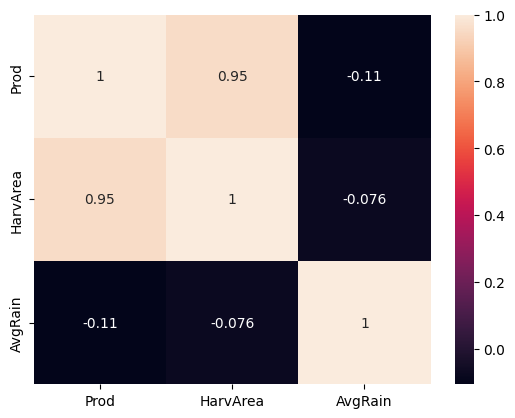

In [ ]:
sns.heatmap(complete_df.corr(), annot=True)
plt.show()

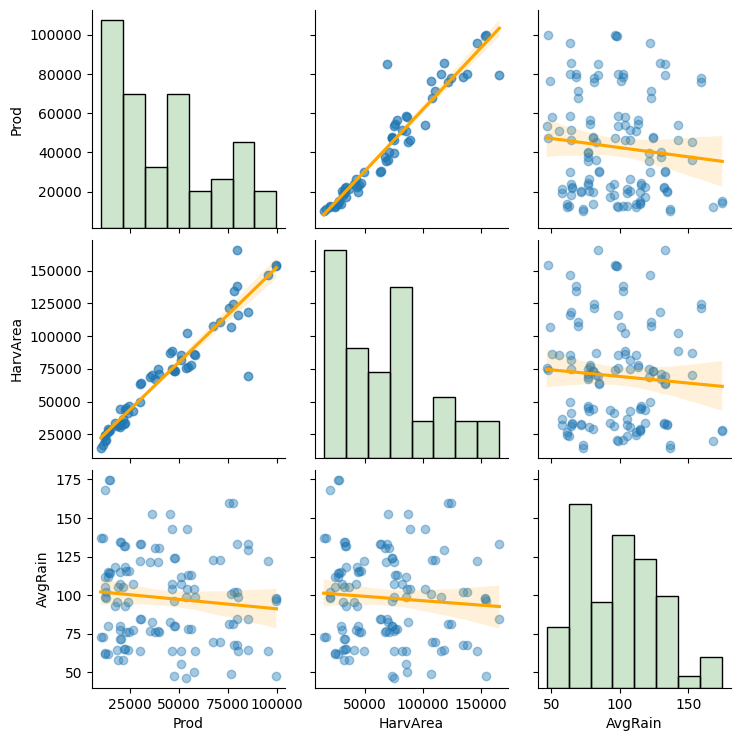

In [ ]:
sns.pairplot(complete_df,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': .4},
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

# แบ่งชุดข้อมูลออกเป็นชุดฝึกอบรมและชุดทดสอบ (Split data into training and testing sets)

In [ ]:
X = complete_df[['HarvArea','AvgRain']]  # Features
y = complete_df['Prod'] # target

In [ ]:
X

,HarvArea,AvgRain
0,154160.0,96.374153
1,154160.0,47.839271
2,73823.0,96.374153
3,73823.0,47.839271
4,146284.0,122.330252
...,...,...
117,75597.0,46.444330
118,85854.0,111.823903
119,85854.0,55.181041
120,20245.0,168.229246


In [ ]:
y

0      99868.0
1      99868.0
2      47337.0
3      47337.0
4      95702.0
        ...   
117    53558.0
118    51103.0
119    51103.0
120    12268.0
121    12268.0
Name: Prod, Length: 122, dtype: float64

In [ ]:
# แบ่งชุดข้อมูลฝึกสอน 80% และ ชุดข้อมูลทดสอบ 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# สร้างโมเดลจำลอง

## K-Nearest Neighbors Regression (KNN-R)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

### ทำ Normalization ข้อมูล (Normalization Data)

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.91924013, 0.38215586],
       [0.91924013, 0.        ],
       [0.36669326, 0.38215586],
       [0.36669326, 0.        ],
       [0.86507009, 0.58653001],
       [0.86507009, 0.12479701],
       [0.19888716, 0.58653001],
       [0.19888716, 0.12479701],
       [0.80976519, 0.42643148],
       [0.80976519, 0.15652318],
       [0.7830722 , 0.42643148],
       [0.7830722 , 0.15652318],
       [1.        , 0.66935077],
       [1.        , 0.28663056],
       [0.33632176, 0.66935077],
       [0.33632176, 0.28663056],
       [0.71509828, 0.87904516],
       [0.71509828, 0.26451408],
       [0.69414144, 0.87904516],
       [0.69414144, 0.26451408],
       [0.62055518, 0.59234337],
       [0.62055518, 0.1712203 ],
       [0.60060938, 0.59234337],
       [0.60060938, 0.1712203 ],
       [0.44677222, 0.40066067],
       [0.44677222, 0.12423757],
       [0.65549472, 0.40066067],
       [0.65549472, 0.12423757],
       [0.39516074, 0.51328176],
       [0.39516074, 0.23794053],
       [0.

In [ ]:
X_test_scaled

array([[ 0.        ,  0.42824944],
       [ 0.0249804 ,  0.45194992],
       [ 0.0249804 ,  0.11666594],
       [ 0.02758711,  0.50105893],
       [ 0.02758711,  0.10918356],
       [ 0.04546955,  0.50105893],
       [ 0.04546955,  0.10918356],
       [-0.03986409,  0.69993793],
       [-0.03986409,  0.19705386],
       [-0.02487035,  0.69993793],
       [-0.02487035,  0.19705386],
       [ 0.91523034,  0.39594425],
       [ 0.91523034,  0.39101774],
       [ 0.67517917,  0.64169655],
       [ 0.67517917,  0.12864451],
       [ 0.5935183 ,  0.41874709],
       [ 0.5935183 ,  0.00681849],
       [ 0.45453733,  0.440626  ],
       [ 0.45453733,  0.0184538 ],
       [ 0.37889459,  0.40034527],
       [ 0.37889459, -0.01098353],
       [ 0.44944083,  0.5038047 ],
       [ 0.44944083,  0.05780792],
       [-0.00180888,  0.94793131],
       [-0.00180888,  0.39924135]])

### สร้างโมเดล

In [ ]:
knnr = KNeighborsRegressor(n_neighbors = 8, metric='euclidean')
knnr.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=8)

Text(0.5, 1.0, 'ELBOW PLOT')

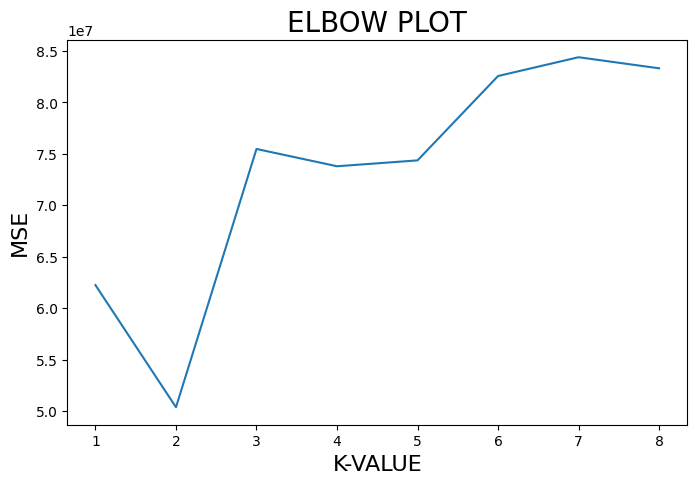

In [ ]:
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(figsize=(8,5))
k_list = np.arange(1, 9, 1)
knn_dict = {} # To store k and mae pairs
for i in k_list:
#Knn Model Creation
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(X_train_scaled, y_train)
    y_knn_pred = model_knn.predict(X_test_scaled)
#Storing MSE
    mse = mean_squared_error(y_test, y_knn_pred)
    knn_dict[i] = mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=16)
ax.set_ylabel('MSE' ,fontsize=16)
ax.set_title('ELBOW PLOT' ,fontsize=20)

### การพยากรณ์

**ชุดข้อมูลฝึกฝน**

In [ ]:
y_pred_train = knnr.predict(X_train)
y_pred_train

array([88784.75, 88784.75, 45636.75, 45636.75, 88472.  , 88472.  ,
       24491.75, 24491.75, 82958.5 , 82958.5 , 82958.5 , 82958.5 ,
       88784.75, 88784.75, 49237.25, 49237.25, 78035.75, 78035.75,
       76212.5 , 76212.5 , 68213.  , 68213.  , 68213.  , 68213.  ,
       50425.5 , 50425.5 , 73662.5 , 73662.5 , 49243.75, 49243.75,
       49243.75, 49243.75, 52881.75, 52881.75, 46982.5 , 46982.5 ,
       45636.75, 45636.75, 45636.75, 45636.75, 50425.5 , 50425.5 ,
       59797.  , 59797.  , 47274.25, 47274.25, 52267.75, 52267.75,
       49237.25, 49237.25, 50425.5 , 50425.5 , 48689.75, 48689.75,
       46982.5 , 46982.5 , 33477.75, 33477.75, 33477.75, 33477.75,
       23304.5 , 23304.5 , 18056.25, 18056.25, 22583.5 , 22583.5 ,
       24491.75, 24491.75, 23112.5 , 23112.5 , 20532.  , 20532.  ,
       20532.  , 20532.  , 20532.  , 20532.  , 20777.75, 20777.75,
       19521.25, 19521.25, 19743.5 , 19743.5 , 19521.25, 19521.25,
       23112.5 , 23112.5 , 15776.25, 15776.25, 19521.25, 19521

**ชุดข้อมูลทดสอบ**

In [ ]:
y_pred_test = knnr.predict(X_test)
y_pred_test

array([14838.75, 14838.75, 14838.75, 14838.75, 14838.75, 15776.25,
       15776.25, 14838.75, 14838.75, 14838.75, 14838.75, 88784.75,
       88784.75, 76212.5 , 76212.5 , 68213.  , 68213.  , 50425.5 ,
       50425.5 , 46982.5 , 46982.5 , 50425.5 , 50425.5 , 14838.75,
       14838.75])

In [ ]:
y_pred = knnr.predict(X)
y_pred

array([88784.75, 88784.75, 45636.75, 45636.75, 88472.  , 88472.  ,
       24491.75, 24491.75, 82958.5 , 82958.5 , 82958.5 , 82958.5 ,
       88784.75, 88784.75, 49237.25, 49237.25, 78035.75, 78035.75,
       76212.5 , 76212.5 , 68213.  , 68213.  , 68213.  , 68213.  ,
       50425.5 , 50425.5 , 73662.5 , 73662.5 , 49243.75, 49243.75,
       49243.75, 49243.75, 52881.75, 52881.75, 46982.5 , 46982.5 ,
       45636.75, 45636.75, 45636.75, 45636.75, 50425.5 , 50425.5 ,
       59797.  , 59797.  , 47274.25, 47274.25, 52267.75, 52267.75,
       49237.25, 49237.25, 50425.5 , 50425.5 , 48689.75, 48689.75,
       46982.5 , 46982.5 , 33477.75, 33477.75, 33477.75, 33477.75,
       23304.5 , 23304.5 , 18056.25, 18056.25, 22583.5 , 22583.5 ,
       24491.75, 24491.75, 23112.5 , 23112.5 , 20532.  , 20532.  ,
       20532.  , 20532.  , 20532.  , 20532.  , 20777.75, 20777.75,
       19521.25, 19521.25, 19743.5 , 19743.5 , 19521.25, 19521.25,
       23112.5 , 23112.5 , 15776.25, 15776.25, 19521.25, 19521

**ชุดข้อมูล X**

In [ ]:
complete_df['Predicted_Prod'] = knnr.predict(X)
complete_df

<ipython-input-107-a4dcf3a8ac5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df['Predicted_Prod'] = knnr.predict(X)


,Prod,HarvArea,AvgRain,Predicted_Prod
0,99868.0,154160.0,96.374153,88784.75
1,99868.0,154160.0,47.839271,88784.75
2,47337.0,73823.0,96.374153,45636.75
3,47337.0,73823.0,47.839271,45636.75
4,95702.0,146284.0,122.330252,88472.00
...,...,...,...,...
117,53558.0,75597.0,46.444330,46982.50
118,51103.0,85854.0,111.823903,50425.50
119,51103.0,85854.0,55.181041,50425.50
120,12268.0,20245.0,168.229246,14838.75


In [ ]:
absolute_dis_list = abs(y_pred - complete_df['Prod'])
result_df_knnr = pd.DataFrame({'y_pred': y_pred, 'complete_df_prod': complete_df['Prod'], 'absolute_difference': absolute_dis_list})

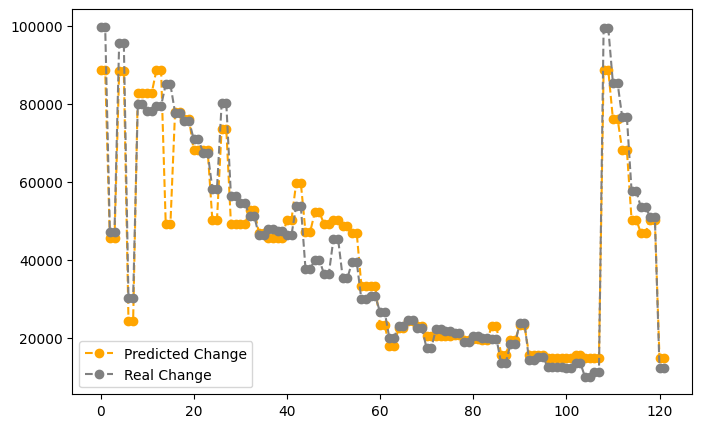

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred, label = 'Predicted Change',
         linestyle="--", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(complete_df['Prod'], label = 'Real Change',
         linestyle="--", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

### การประเมินผลโมเดล

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    print(f"Model: {model_name}")
    print(f"R-squared: {round(r2,2)}")
    print(f"Mean Square Error: {round(mse,2)}")
    print(f"Root Mean Square Error: {round(rmse,2)}")
    print("")
    toRe = {
      'modelName' : model_name,
      'r2' : r2,
      'mse' : mse,
      'rmse' : rmse,
    }
    return toRe

**ชุดข้อมูลฝึกฝน**

In [ ]:
KNNR_report = evaluate_model(y_train, y_pred_train, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: 0.91
Mean Square Error: 53739070.88
Root Mean Square Error: 7330.69



Text(0, 0.5, 'Actual')

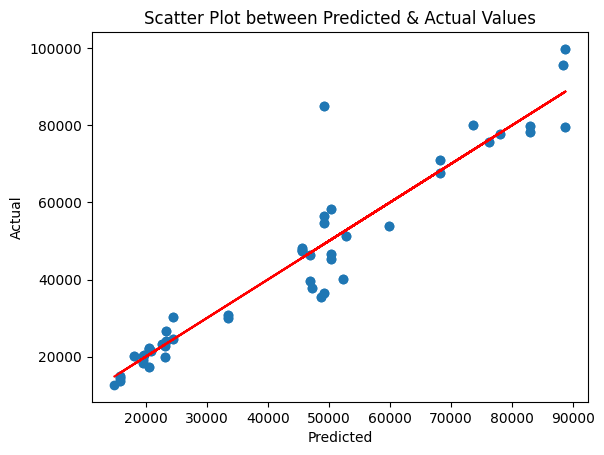

In [ ]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**ชุดข้อมูลทดสอบ**

In [ ]:
evaluate_model(y_test, y_pred_test, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: 0.97
Mean Square Error: 34452338.3
Root Mean Square Error: 5869.61



{'modelName': 'K-Nearest Neighbors Regression',
 'r2': 0.9659602180239428,
 'mse': 34452338.2975,
 'rmse': 5869.611426448943}

Text(0, 0.5, 'Actual')

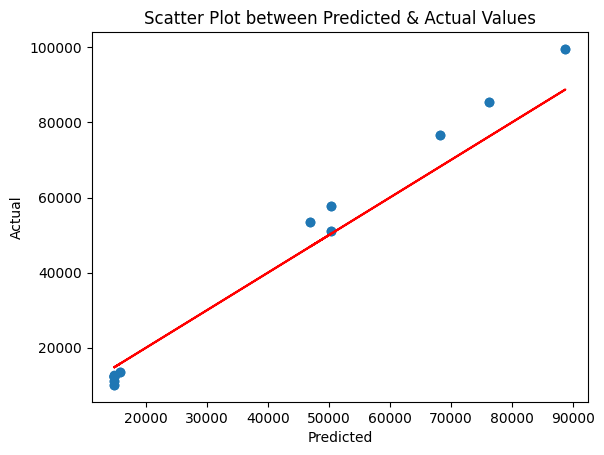

In [ ]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Multiple Linear Regression (MLR)

### สร้างโมเดล

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# ค่าจุดตัดแกน Y ของสมการ
reg.intercept_

2881.486807442794

In [ ]:
# ค่าสัมประสิทธิ์การถดถอยของตัวตอบสนอง X
reg.coef_

array([  0.60687392, -30.19696051])

### การพยากรณ์

**ชุดข้อมูลฝึกฝน**

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([ 93526.96413558,  94992.57006767,  44772.53385923,  46238.13979132,
        87963.42983322,  89734.22206101,  29182.22861662,  30953.02084442,
        83697.55047789,  84732.67580768,  81342.27278638,  82377.39811618,
        99551.45653539, 101019.22680896,  40991.25857208,  42459.02884565,
        73608.71912893,  75965.50725832,  71759.57428842,  74116.36241781,
        66366.16019417,  67981.20927747,  64606.2258202 ,  66221.2749035 ,
        51767.3991518 ,  52827.50935391,  70184.20206449,  71244.3122666 ,
        46781.50409202,  47837.46521891,  45714.01286312,  46769.97399001,
        49418.4025206 ,  50721.89150637,  45192.73940132,  46496.22838708,
        43766.39761352,  45090.16512008,  43553.38486688,  44877.15237343,
        52530.42817003,  53704.21246676,  60513.8546147 ,  61687.63891143,
        39726.82907824,  41355.24604643,  42097.2786178 ,  43725.69558598,
        40976.64692145,  43094.42037962,  51004.63160953,  53122.4050677 ,
        40864.19894049,  

**ชุดข้อมูลทดสอบ**

In [ ]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([12240.27721025, 14353.54961383, 15639.39719479, 14395.21685462,
       15898.09805972, 15973.08905197, 17475.97025707,  7680.88344144,
        9609.49411642,  9003.86859153, 10932.47926651, 93120.27678642,
       93139.17043733, 70996.67853526, 72964.28439754, 64646.29790316,
       66226.08527452, 52299.2887528 , 53918.36137451, 45779.36999779,
       47356.85708276, 51607.29854222, 53317.74079668, 10087.63746426,
       12191.91831776])

**ชุดข้อมูล X**

In [ ]:
y_pred = reg.predict(X)
y_pred

array([ 93526.96413558,  94992.57006767,  44772.53385923,  46238.13979132,
        87963.42983322,  89734.22206101,  29182.22861662,  30953.02084442,
        83697.55047789,  84732.67580768,  81342.27278638,  82377.39811618,
        99551.45653539, 101019.22680896,  40991.25857208,  42459.02884565,
        73608.71912893,  75965.50725832,  71759.57428842,  74116.36241781,
        66366.16019417,  67981.20927747,  64606.2258202 ,  66221.2749035 ,
        51767.3991518 ,  52827.50935391,  70184.20206449,  71244.3122666 ,
        46781.50409202,  47837.46521891,  45714.01286312,  46769.97399001,
        49418.4025206 ,  50721.89150637,  45192.73940132,  46496.22838708,
        43766.39761352,  45090.16512008,  43553.38486688,  44877.15237343,
        52530.42817003,  53704.21246676,  60513.8546147 ,  61687.63891143,
        39726.82907824,  41355.24604643,  42097.2786178 ,  43725.69558598,
        40976.64692145,  43094.42037962,  51004.63160953,  53122.4050677 ,
        40864.19894049,  

In [ ]:
absolute_dis_list = abs(y_pred - complete_df['Prod'])
result_df_mlr = pd.DataFrame({'y_pred': y_pred, 'complete_df_prod': complete_df['Prod'], 'absolute_difference': absolute_dis_list})

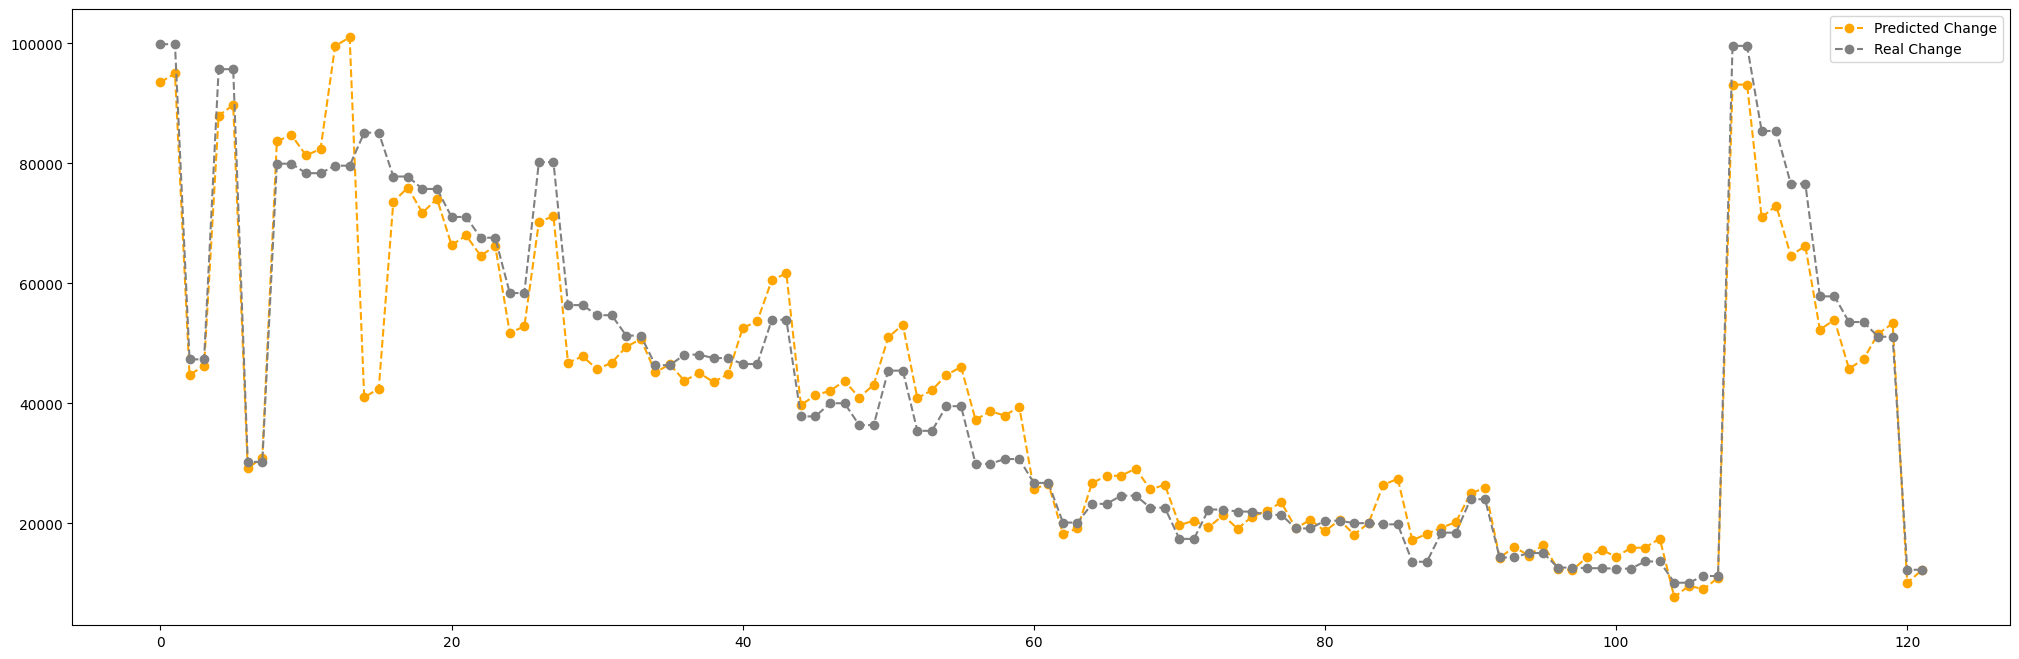

In [ ]:
plt.figure(figsize = (25, 8))
plt.plot(y_pred, label = 'Predicted Change', linestyle="--", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(complete_df['Prod'], label = 'Real Change', linestyle="--", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

### การประเมินผลโมเดล

**ชุดข้อมูลฝึกฝน**

In [ ]:
MLR_report = evaluate_model(y_train, y_pred_train, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: 0.88
Mean Square Error: 68350360.52
Root Mean Square Error: 8267.43



Text(0, 0.5, 'Actual')

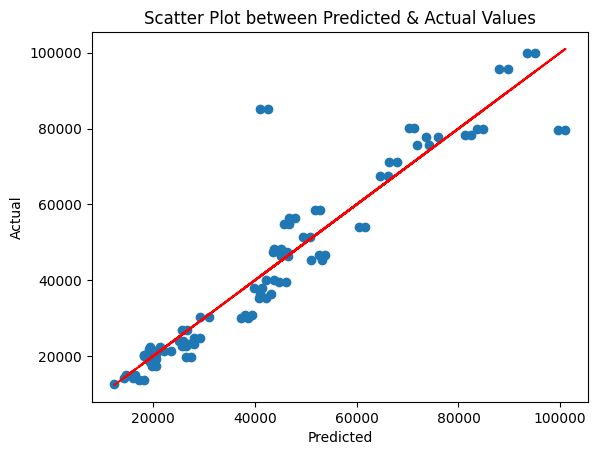

In [ ]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**ชุดข้อมูลทดสอบ**

In [ ]:
evaluate_model(y_test, y_pred_test, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: 0.96
Mean Square Error: 36499465.56
Root Mean Square Error: 6041.48



{'modelName': 'Multiple Linear Regression',
 'r2': 0.9639376044950178,
 'mse': 36499465.55561938,
 'rmse': 6041.478755703721}

Text(0, 0.5, 'Actual')

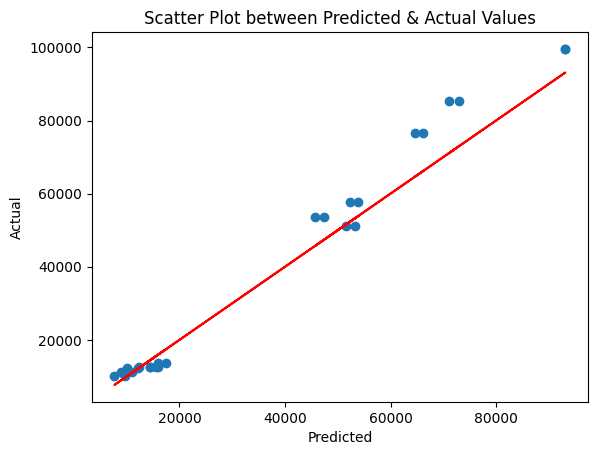

In [ ]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# บทสรุปและการเปรียบเทียบ

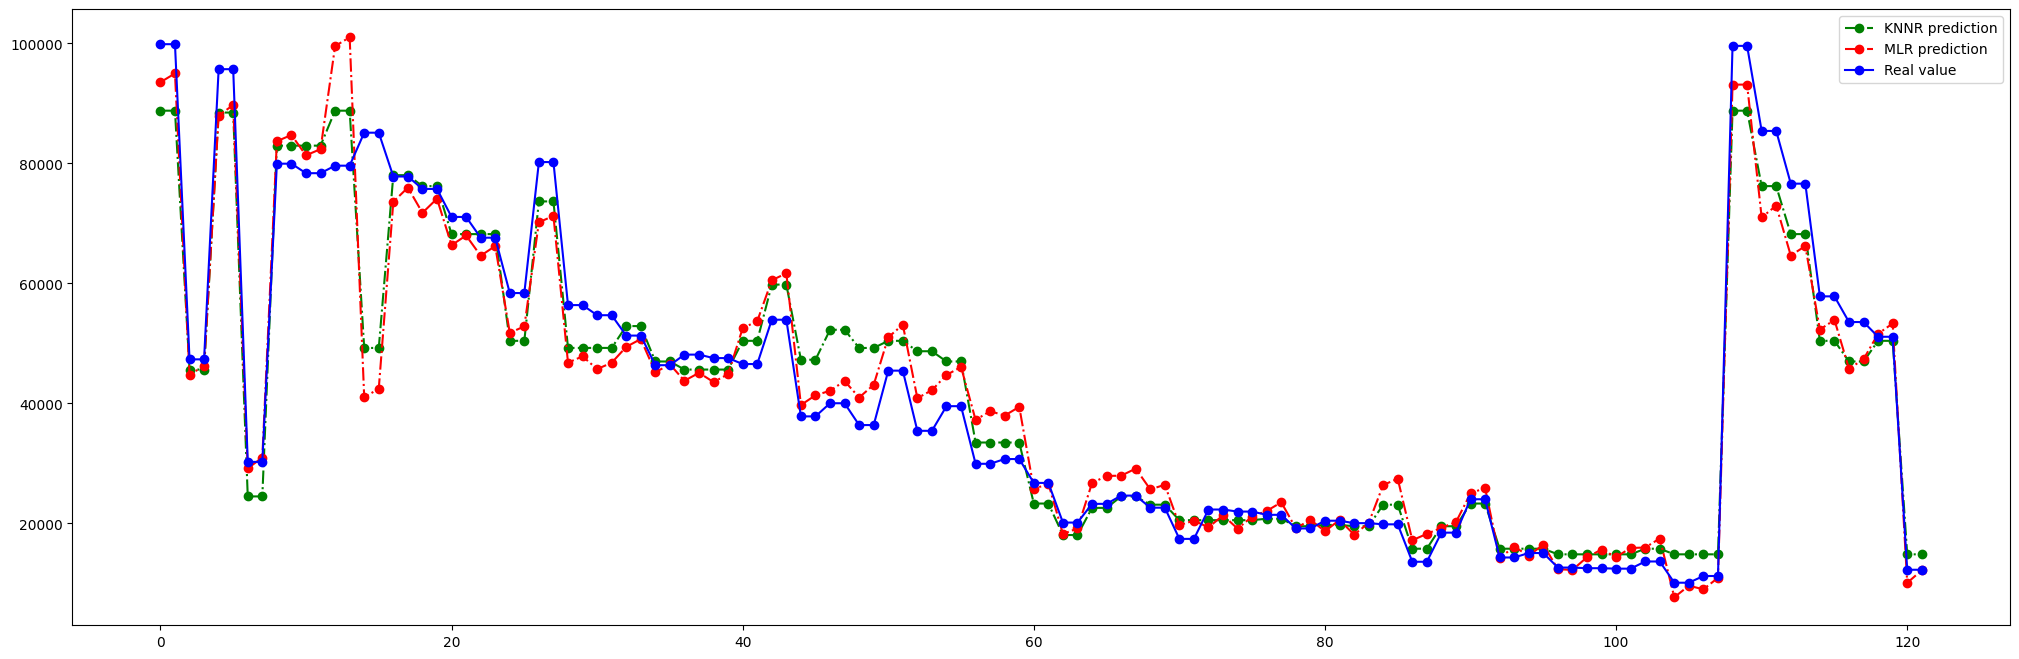

In [ ]:
plt.figure(figsize = (25, 8))
plt.plot(result_df_knnr['y_pred'], label = 'KNNR prediction', linestyle="-.",marker='o', color='green') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(result_df_mlr['y_pred'], label = 'MLR prediction', linestyle="-.",marker='o', color='red') # การเปลี่ยนแปลงที่แท้จริง)
plt.plot(complete_df['Prod'], label = 'Real value', linestyle="-", marker='o', color='blue') # การเปลี่ยนแปลงที่แท้จริง)
plt.legend()

In [ ]:
KNNR_report['modelName']

'K-Nearest Neighbors Regression'

In [ ]:
def print_rep(report) :
  print('Model :', report['modelName'])
  print('R2 :', round(report['r2'], 2))
  print('MSE :', round(report['mse'], 2))
  print('RMSE :', round(report['rmse'], 2))

print_rep(KNNR_report)
print('--------------------------------------')
print_rep(MLR_report)

Model : K-Nearest Neighbors Regression
R2 : 0.91
MSE : 53739070.88
RMSE : 7330.69
--------------------------------------
Model : Multiple Linear Regression
R2 : 0.88
MSE : 68350360.52
RMSE : 8267.43
